In [73]:
import glob
import math
import os
import pickle

import seaborn as sns 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from shapely.geometry import Point, Polygon

In [8]:
with open('outputs/identified_regions_min_2.pkl', 'rb') as f:
	regions = pickle.load(f)
df = pd.read_csv('supermag-stations-info.csv')

In [29]:
df

,IAGA,GEOLON,GEOLAT,AACGMLON,AACGMLAT,STATION-NAME,OPERATOR-NUM,OPERATORS
0,SON,66.44,25.12,139.81,19.36,Sonmiani,1,INTERMAGNET
1,AMU,210.13,61.24,-93.38,61.32,Anchorage,1,THEMIS
2,YKC,245.52,62.48,-56.85,69.42,Yellowknife,3,CANMOS
3,CBB,254.97,69.12,-47.81,77.05,Cambridge Bay,2,CANMOS
4,RES,265.11,74.69,-35.54,82.93,Resolute Bay,2,CANMOS
...,...,...,...,...,...,...,...,...
569,MHV,37.73,54.94,112.36,51.27,Mikhnevo,1,IZMIRAN
570,NAD,72.51,65.53,147.36,61.94,Nadym,1,IZMIRAN
571,WSE,33.10,66.55,112.22,63.39,White Sea,1,IZMIRAN
572,POD,90.03,61.58,164.07,57.82,Bor,1,IZMIRAN


In [79]:
def plotting_regions(regions, region_numbers, lat_min, lat_max, lon_min, lon_max, station_info, region_num):

	colors = sns.color_palette('tab20', len(regions))

	for i, region in zip(range(0, len(regions), 2), region_numbers):
		print(region)
		print(i)
		poly = regions[f'region_{region}']['shape'].convex_hull
		poly = gpd.GeoDataFrame(geometry=[poly])

		if i == 0:
			ax = poly.plot(figsize=(13,8), facecolor=colors[i+1], edgecolor=colors[i])
		else:
			poly.plot(ax=ax, facecolor=colors[i+1], edgecolor=colors[i])

	station_info.plot(ax=ax, kind='scatter', x='GEOLON', y='GEOLAT')
	for idx, row in station_info.iterrows():
		ax.annotate(row['IAGA'], (row['GEOLON'], row['GEOLAT']))
	
	plt.xlim((lon_min-5), (lon_max+5))
	plt.ylim((lat_min-5), (lat_max+5))

	plt.title(f'Region {region_num}')


	plt.show()

235
0
386
2


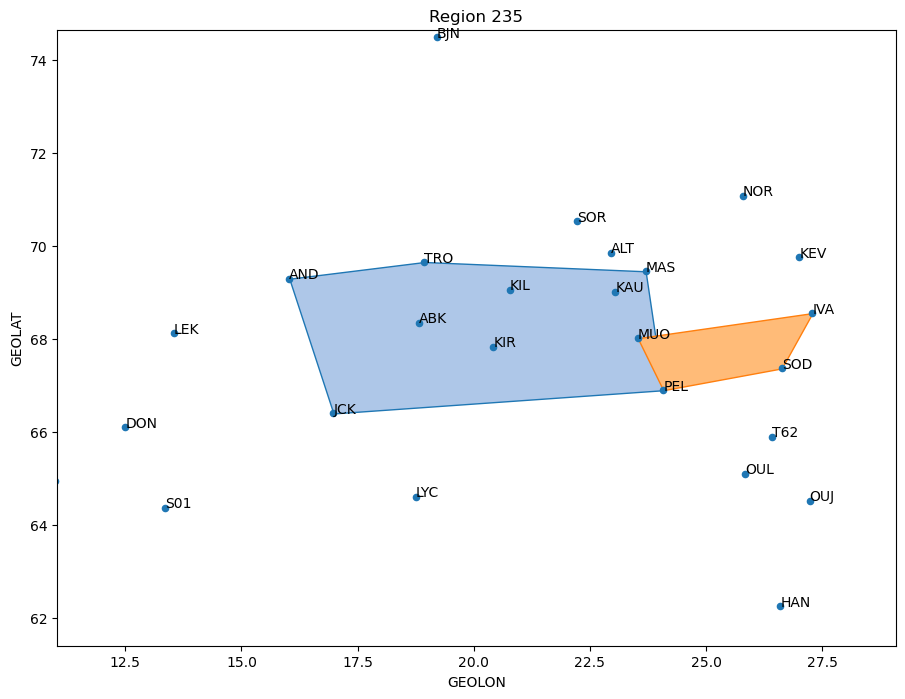

In [80]:
region_numbers = [235, 386]

stations = regions[f'region_{region_numbers[0]}']['station']

lats = [df.loc[df['IAGA'] == station, 'GEOLAT'].values[0] for station in stations]
lons = [df.loc[df['IAGA'] == station, 'GEOLON'].values[0] for station in stations]

lat_min, lat_max = min(lats), max(lats)
lon_min, lon_max = min(lons), max(lons)

plotting_regions(regions, region_numbers, lat_min, lat_max, lon_min, lon_max, df, region_number)